Accuracy: 0.9666666666666667


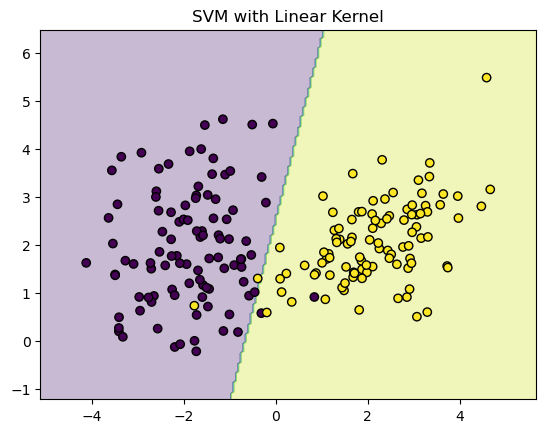

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
df = pd.read_csv("svm_linear.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel="linear")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

import numpy as np
xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
plt.title("SVM with Linear Kernel")
plt.show()

In [7]:
df = pd.read_csv("svm_multi.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = SVC(kernel="rbf")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[29  0  0]
 [ 0 26  0]
 [ 0  0 35]]
Accuracy: 1.0


Test Accuracy: 0.8


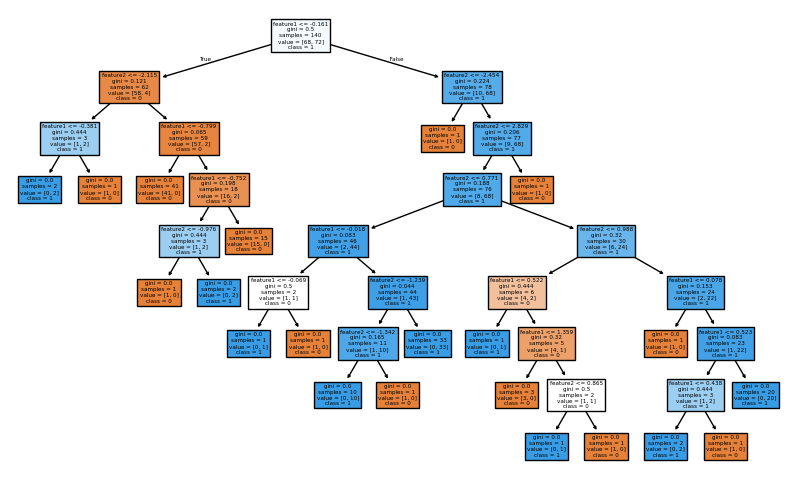

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

df = pd.read_csv("dt_class.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=df.columns[:-1], class_names=[str(c) for c in set(y)], filled=True)
plt.show()

In [9]:
df = pd.read_csv("dt_depth.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for depth in [2, 5, None]:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    print(f"Depth={depth}, Train Acc={clf.score(X_train, y_train)}, Test Acc={clf.score(X_test, y_test)}")

Depth=2, Train Acc=0.8857142857142857, Test Acc=0.8333333333333334
Depth=5, Train Acc=0.9428571428571428, Test Acc=0.8166666666666667
Depth=None, Train Acc=1.0, Test Acc=0.8333333333333334


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

df = pd.read_csv("dt_reg.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for depth in [2, 5, None]:
    reg = DecisionTreeRegressor(max_depth=depth)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Depth={depth}, RMSE={rmse:.4f}")

Depth=2, RMSE=41.0146
Depth=5, RMSE=20.7834
Depth=None, RMSE=22.9757
